In [1]:
import matplotlib.pyplot as plt
import numpy as np

import ipywidgets as widgets
from IPython.display import display

In [2]:
def calculate_center_np(points_array):
    # center = points_array.mean(axis=0) # Calculate the mean of each column (x and y coordinates)

    extremes = points_array[[0, -1]]  # Select the first and last points
    center = extremes.mean(axis=0)    # Calculate the mean of these points
    return center

In [3]:
def rotate_points_np(points_array, angle_d):
    # Calculate center of the points using the extremes
    X_c = calculate_center_np(points_array)

    # Use center as the origin
    points_c = points_array - X_c

    # Apply rotation
    angle_r = np.radians(angle_d)
    r_matrix = np.array([
        [np.cos(angle_r), -np.sin(angle_r)],
        [np.sin(angle_r),  np.cos(angle_r)]
    ])
    points_r = np.dot(points_c, r_matrix.T)  # Transpose r_matrix to match shapes

    # Translate to original center point
    points_new = points_r + X_c
    return points_new

In [4]:
def rotate_points_with_center_np(points_array, X_c, angle_d):
    # Convert points to NumPy array if necessary
    if not isinstance(points_array, np.ndarray):
        points_array = np.array(points_array)

    # Subtract the center from all points to translate them
    points_translated = points_array - X_c

    # Convert angle from degrees to radians
    angle_r = np.radians(angle_d)

    # Create the rotation matrix
    r_matrix = np.array([
        [np.cos(angle_r), -np.sin(angle_r)],
        [np.sin(angle_r), np.cos(angle_r)]
    ])

    # Apply the rotation matrix to the points
    points_rotated = np.dot(points_translated, r_matrix.T)  # .T for transpose to match shapes

    # Translate the points back using the original center
    points_new = points_rotated + X_c

    return points_new

In [5]:
def calculate_translation_error_np(points_ref_array, points_i_array):
    # Ensure the input is in NumPy array format
    if not isinstance(points_ref_array, np.ndarray):
        points_ref_array = np.array(points_ref_array)
    if not isinstance(points_i_array, np.ndarray):
        points_i_array = np.array(points_i_array)

    # Calculate the center of the reference points and the input points
    # Using the mean of the extreme points
    XC_ref = (points_ref_array[0] + points_ref_array[-1]) / 2
    XC = (points_i_array[0] + points_i_array[-1]) / 2

    # Calculate the translation error
    X_error = XC_ref - XC

    return X_error

In [6]:
def translate_points_np(points_array, X_delta):
    # Ensure the input is in NumPy array format
    if not isinstance(points_array, np.ndarray):
        points_array = np.array(points_array)

    # Ensure X_delta is a NumPy array to allow for broadcasting
    if not isinstance(X_delta, np.ndarray):
        X_delta = np.array(X_delta)

    # Applying translation to each point
    points_translated = points_array + X_delta

    return points_translated

In [7]:
import numpy as np

def cost_rotation_ref_np(points_ref_array, points_translated_array, angle_d):
    # Assuming rotate_points_with_center_np is the NumPy version of rotate_points
    XC = (points_translated_array[0] + points_translated_array[-1]) / 2
    points_rotated = rotate_points_with_center_np(points_translated_array, XC, angle_d)

    # Calculate costs using norms
    cost_start = np.linalg.norm(points_ref_array[0] - points_rotated[0])
    cost_end = np.linalg.norm(points_ref_array[-1] - points_rotated[-1])
    cost = np.power(cost_start, 2) + np.power(cost_end, 2)

    return cost

In [8]:
def calculate_correction_np(points_ref, points_measured, angle_min, angle_max, step):
    angle_array = np.arange(angle_min, angle_max + step, step)

    # Ensure inputs are NumPy arrays
    points_ref_array = np.array(points_ref) if not isinstance(points_ref, np.ndarray) else points_ref
    points_measured_array = np.array(points_measured) if not isinstance(points_measured, np.ndarray) else points_measured

    # Calculate error
    X_error = calculate_translation_error_np(points_ref_array, points_measured_array)

    # Correct position for each point
    points_translated = translate_points_np(points_measured_array, X_error)

    # Calculate rotation costs for each angle
    cost_array = [cost_rotation_ref_np(points_ref_array, points_translated, angle) for angle in angle_array]

    # Find the minimum cost and its corresponding angle
    index = np.argmin(cost_array)
    angle_selected = angle_array[index]

    return X_error, angle_selected

In [9]:
def plot_all_points_np(points1, points2, range=(-2, 8)):
    # Assuming points1 and points2 are NumPy arrays with shape (n, 2)
    # where each row is a point and the two columns are x and y coordinates.

    # Directly access x and y coordinates
    x_c1, y_c1 = points1[:, 0], points1[:, 1]
    x_c2, y_c2 = points2[:, 0], points2[:, 1]

    # Plotting
    plt.figure(figsize=(5, 5))  # Optional: Sets the figure size
    plt.scatter(x_c1, y_c1, color='blue', marker='o', label='Points 1')  # Plot points1 as scatter plot
    plt.scatter(x_c2, y_c2, color='red', marker='x', label='Points 2')  # Plot points2 as scatter plot
    plt.title('Plot of Points')  # Optional: Adds a title

    # Setting the x-axis and y-axis range
    plt.xlim(range)
    plt.ylim(range)

    plt.xlabel('X')
    plt.ylabel('Y')
    plt.grid(True)
    plt.legend()  # Optional: Adds a legend if labels are provided
    plt.show()

In [10]:
def plot_points_np(points1):
    # Assuming points1 is a NumPy array with shape (n, 2),
    # where each row is a point, and the two columns are x and y coordinates.

    # Directly access x and y coordinates
    x_c1, y_c1 = points1[:, 0], points1[:, 1]

    # Plotting
    plt.figure(figsize=(5, 5))  # Optional: Sets the figure size
    plt.scatter(x_c1, y_c1, color='blue', marker='o', label='Points')  # Plot points as scatter plot
    plt.title('Plot of Points')  # Optional: Adds a title

    # Setting the x-axis and y-axis range
    plt.xlim(-2, 2)
    plt.ylim(-2, 2)

    plt.xlabel('X')
    plt.ylabel('Y')
    plt.grid(True)
    plt.legend()  # Optional: Adds a legend if a label is provided
    plt.show()

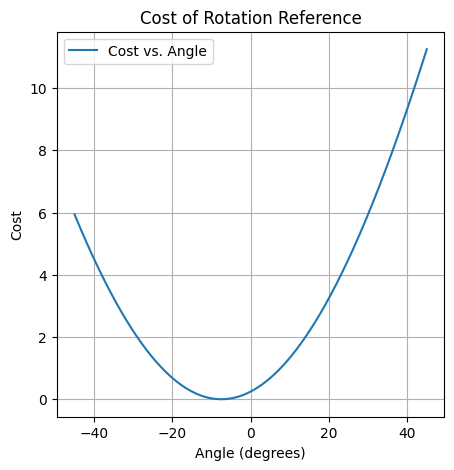

In [11]:
points1 = [(-1, -1),   (1, 2),   (2.5, 3)]  # This example uses tuples to represent the original Point objects for simplicity
points2 = [(-2, -1.5), (0, 1.5), (1,3)]

points1_np = np.array(points1)  # References
points2_np = np.array(points2)  # Measured

# Define your parameters
step = 0.01
angle_min = -45
angle_max = 45
angle_array = np.arange(angle_min, angle_max + step, step)

# Calculate error using the updated function
X_error = calculate_translation_error_np(points1_np, points2_np)

# Correct position for each point using the updated function
points_translated_np = translate_points_np(points2_np, X_error)

# Generate cost array using the updated function
cost_array = [cost_rotation_ref_np(points1_np, points_translated_np, angle) for angle in angle_array]

# Plotting
plt.figure(figsize=(5, 5))
plt.plot(angle_array, cost_array, label='Cost vs. Angle')
plt.xlabel('Angle (degrees)')
plt.ylabel('Cost')
plt.title('Cost of Rotation Reference')
plt.grid(True)
plt.legend()
plt.show()

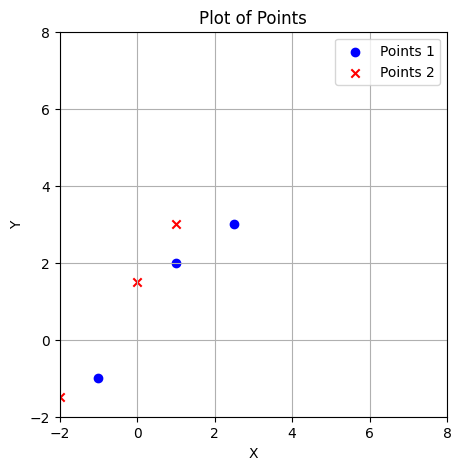

In [12]:
plot_all_points_np(points1_np, points2_np)

In [13]:
index = cost_array.index(min(cost_array))
angle_selected = angle_array[index]
print(f"angle: {angle_selected}, cost: {cost_array[index]}")

points_mod = rotate_points_np(points_translated_np, angle_selected)

angle: -7.500000000007461, cost: 0.00434823002121011


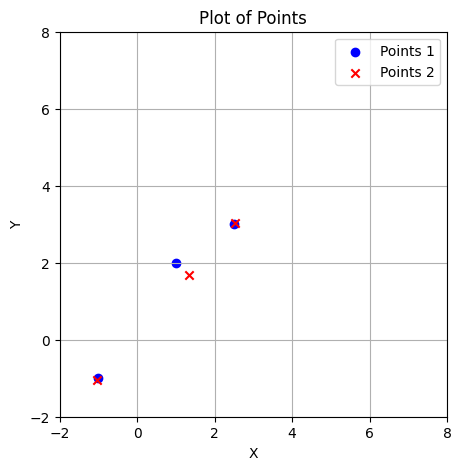

In [14]:
plot_all_points_np(points1_np, points_mod)